In [1]:
import env
import actor
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import pandas as pd

In [2]:
path_to_data = 'train.xlsx'
environment = env.DataCenterEnv(path_to_data)
print(environment.price_values.shape)

(1096, 24)


In [3]:
df = pd.DataFrame(environment.price_values)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,38.838120,33.993558,30.053896,24.881168,23.124434,28.803768,36.652199,50.544790,56.924398,63.911743,...,58.981095,54.614881,53.981651,60.162509,67.466077,62.436697,58.464252,50.285712,50.451268,45.259334
std,21.884887,16.453507,15.947602,14.585498,14.436540,15.899613,20.775206,28.969477,30.775903,39.165093,...,39.279068,38.096263,40.691564,46.205986,75.780436,45.182318,77.865406,22.377123,20.360752,19.155459
min,0.010000,0.300000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,8.030000,1.000000,0.010000,0.010000,1.000000,10.410000,5.530000,8.360000,18.920000,16.090000
25%,25.407500,22.000000,19.007500,13.435000,11.237500,17.927500,21.977500,30.000000,34.982500,39.975000,...,37.615000,34.605000,33.602500,35.000000,36.040000,36.405000,35.905000,34.040000,35.085000,30.850000
50%,33.470000,29.465000,26.025000,21.685000,20.000000,25.725000,32.895000,43.590000,49.000000,52.715000,...,49.930000,46.850000,45.030000,49.895000,55.990000,55.825000,51.000000,43.545000,41.960000,37.395000
75%,52.850000,46.352500,40.717500,34.000000,31.942500,39.405000,52.187500,71.950000,76.775000,82.855000,...,75.000000,70.000000,69.567500,74.992500,80.792500,79.302500,73.017500,65.960000,66.465000,60.977500
max,500.000000,180.000000,200.000000,160.000000,160.000000,160.000000,150.500000,179.320000,227.130000,500.000000,...,950.000000,950.000000,950.000000,769.470000,1762.540000,1066.820000,2500.000000,300.030000,180.000000,210.100000


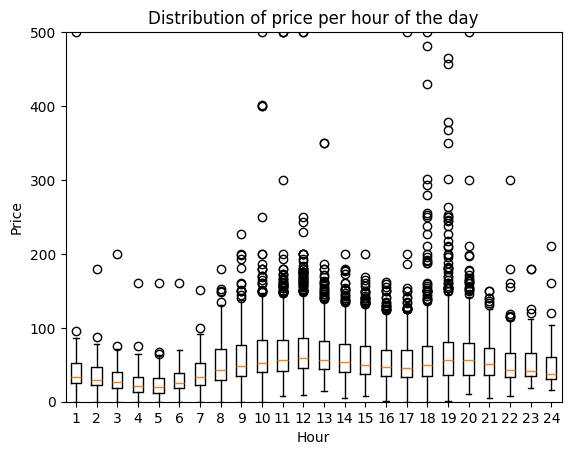

In [4]:
plt.boxplot(environment.price_values)
plt.ylim(0,500)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Distribution of price per hour of the day')
plt.show()

(7, 24)
24.31


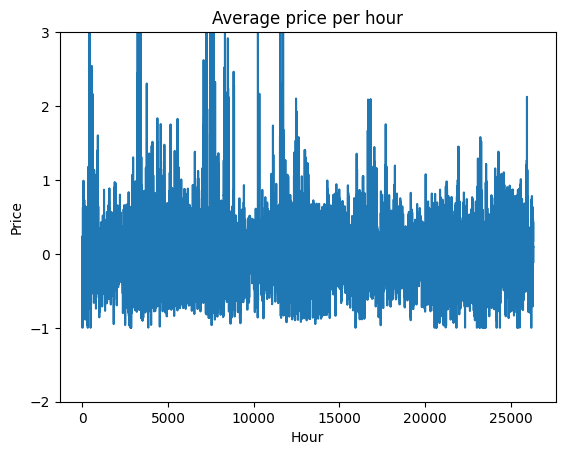

In [ ]:
average_price = environment.price_values[:7]
print(average_price.shape)
average_price = average_price.reshape([-1])
print(average_price[0])
average_price_value = sum(average_price)/np.shape(average_price)[0]
price_difference = []
average_price_value_tracker = []
for days in environment.price_values:
    for price in days:
        difference = price - average_price_value
        price_difference.append(difference/average_price_value)
        average_price_value_tracker.append(average_price_value)
        average_price_value = average_price_value - average_price[0]/np.shape(average_price)[0] + price/np.shape(average_price)[0]
        average_price = average_price[1:]
        average_price = np.append(average_price,price)

plt.plot(price_difference)
plt.ylim([-2,3])
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Average price per hour')
plt.show()


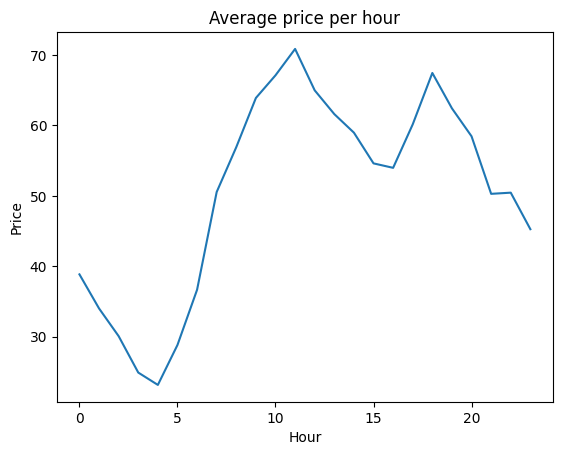

In [8]:
avg_price_per_hour = environment.price_values.mean(axis=0)
plt.plot(avg_price_per_hour)
plt.xlabel('Hour')
plt.ylabel('Price')
plt.title('Average price per hour')
plt.show()

In [20]:
data_month = {}
for i in range(len(environment.timestamps)):
    month = environment.timestamps[i].month_name()
    if month in data_month:
        data_month[month].append(environment.price_values[i].mean())
    else:
        data_month[month] = [environment.price_values[i].mean()]

for month in data_month:
    data_month[month] = np.mean(data_month[month])

print(data_month)

{'January': np.float64(53.16035394265234), 'February': np.float64(47.57212745098039), 'March': np.float64(42.72274641577061), 'April': np.float64(46.34965277777778), 'May': np.float64(46.399726702508964), 'June': np.float64(45.45369907407407), 'July': np.float64(44.88036738351254), 'August': np.float64(40.299551971326174), 'September': np.float64(54.35013425925926), 'October': np.float64(65.62487903225808), 'November': np.float64(64.73027777777777), 'December': np.float64(55.699704301075265)}


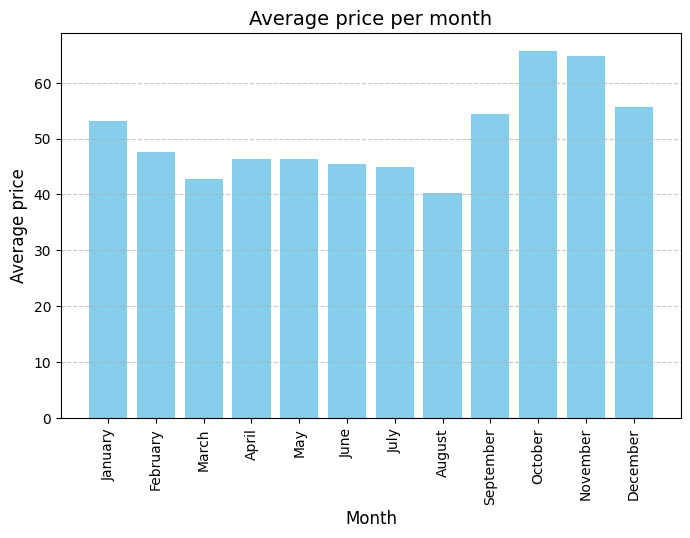

In [23]:
# Extract keys and values
x = list(data_month.keys())  # x-axis labels
y = list(data_month.values())  # y-axis values

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue')  # Bar chart; use plt.plot for line chart
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average price', fontsize=12)
plt.title('Average price per month', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Simple Moving Average Plots
### Setting up functions etc. for data collection

In [130]:
import inflect
o_suffix = inflect.engine()
def plot_data(plotting_data):
    """
    Plot price, storage level, and moving average with thresholds.

    :param plotting_data: List of tuples, where each tuple contains:
        (storage_levels, prices, hours, days, moving_average, upper_threshold, lower_threshold).
    """
    # Extract data from plotting_data
    storage_levels = []
    prices = []
    hours = []
    days = []
    moving_averages = []
    upper_thresholds = []
    lower_thresholds = []

    for data in plotting_data:
        sl, pr, hr, dy, ma, ut, lt = data
        storage_levels.append(sl)
        prices.append(pr)
        hours.append(hr)
        days.append(dy)
        moving_averages.append(ma)
        upper_thresholds.append(ut)
        lower_thresholds.append(lt)

    # Generate x-axis labels
    time_labels = []
    for hour, day in zip(hours, days):
        if int(hour) == 24:
            time_labels.append(f"{o_suffix.ordinal(int(day))} day")
        else:
            time_labels.append(str(int(hour)))

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the bar chart for storage levels on the primary y-axis (ax1)
    bar_plot = ax1.bar(range(len(storage_levels)), storage_levels, alpha=0.6, color='orange', label="Storage Level")
    ax1.set_xlabel("Time (hours)")
    ax1.set_ylabel("Storage Level")
    ax1.set_xticks(range(len(time_labels)))
    ax1.set_xticklabels(time_labels, rotation=60, ha="right", fontsize=9)

    # Create a secondary y-axis for prices and related plots
    ax2 = ax1.twinx()
    ax2.plot(prices, 'o', label="Price", color='blue')
    ax2.plot(moving_averages, '-', label="Moving Average", color='green')
    ax2.plot(upper_thresholds, '--', label="Upper Threshold", color='red')
    ax2.plot(lower_thresholds, '--', label="Lower Threshold", color='red')
    ax2.set_ylabel("Price")

    # Combine legends from both axes
    handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
    handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()
    handles = handles_ax1 + handles_ax2
    labels = labels_ax1 + labels_ax2
    fig.legend(handles, labels, bbox_to_anchor=(0.17, 1.0), bbox_transform=ax1.transAxes)

    # Title and layout
    plt.title("Price, Moving Average, and Storage Level Over Time")
    plt.tight_layout()
    plt.show()


def plot_timewindow_rewards(time_windows, rewards):
    """
    Plot rewards as a function of time window sizes, marking the best window size.

    :param time_windows: List of time window sizes (in hours).
    :param rewards: Corresponding list of rewards per year.
    """
    plt.figure(figsize=(10, 6))
    
    # Convert rewards to millions for better readability
    rewards_in_millions = [r / 1e6 for r in rewards]
    
    # Find the best window size and corresponding reward
    max_reward = max(rewards)
    max_index = rewards.index(max_reward)
    best_window_size = time_windows[max_index]
    max_reward_millions = max_reward / 1e6
    
    # Plot the data
    plt.plot(
        time_windows, 
        rewards_in_millions, 
        marker='o', 
        markersize=4, 
        linestyle='-', 
        color='b', 
        label='Reward per Year (millions)'
    )
    
    # Highlight the best point
    plt.scatter(
        [best_window_size], 
        [max_reward_millions], 
        color='red', 
        zorder=5, 
        label=f'Best Window Size: {best_window_size} hrs'
    )
    # Adjust the annotation position closer to the point
    plt.annotate(
        f'{best_window_size} hrs\n{max_reward_millions:.2f}M',
        xy=(best_window_size, max_reward_millions),
        xytext=(best_window_size - 1, max_reward_millions - 0.2),  # Slightly left and below
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=10
    )
    
    # Add titles and labels
    plt.title('Reward per Year vs Time Window Size', fontsize=14)
    plt.xlabel('Time Window Size (hours)', fontsize=12)
    plt.ylabel('Reward per Year (millions)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Reduce the number of x-axis labels
    step = 4  # Show every other label
    plt.xticks(time_windows[2::step], rotation=45)
    
    # Add legend and layout
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()



# Exponential Moving Average

In [213]:
# Example: List of 24 lists, each with 24 items
lists = [[i for i in range(24)] for _ in range(24)]
print(lists)
# Zip the lists
zipped = list(zip(*lists))

# Display the result
print(zipped)


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

In [304]:
import matplotlib.pyplot as plt
import numpy as np
import inflect

o_suffix = inflect.engine()

def plot_data_ema(plotting_data):
    """
    Plot price, storage level, and moving average with thresholds.

    :param plotting_data: List of tuples, where each tuple contains:
        (storage_levels, prices, hours, days, moving_average, upper_threshold, lower_threshold).
    """
    # Extract data from plotting_data
    storage_levels = []
    prices = []
    hours = []
    days = []
    means = []

    for data in plotting_data:
        sl, pr, hr, dy, ma = data
        storage_levels.append(sl)
        prices.append(pr)
        hours.append(hr)
        days.append(dy)
        means.append(ma)

    # Generate x-axis labels
    time_labels = []
    for hour, day in zip(hours, days):
        if int(hour) == 24:
            time_labels.append(f"{o_suffix.ordinal(int(day))} day")
        else:
            time_labels.append(str(int(hour)))

    # Determine colors for means based on every 24-step interval
    colors = ['purple'] * len(means)  # Default color is blue
    for start in range(0, len(means), 24):
        end = min(start + 24, len(means))
        interval = means[start:end]
        if len(interval) > 0:
            sorted_indices = sorted(range(len(interval)), key=lambda i: interval[i])
            for low in sorted_indices[:14]:
                colors[start + low] = 'green'
            for high in sorted_indices[-2:]:
                colors[start + high] = 'red'  # Highest value

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the bar chart for storage levels on the primary y-axis (ax1)
    ax1.bar(range(len(storage_levels)), storage_levels, alpha=0.6, color='orange', label="Storage Level")
    ax1.set_xlabel("Time (hours)")
    ax1.set_ylabel("Storage Level")
    ax1.set_xticks(range(len(time_labels)))
    ax1.set_xticklabels(time_labels, rotation=60, ha="right", fontsize=9)

    # Create a secondary y-axis for prices and related plots
    ax2 = ax1.twinx()
    ax2.plot(prices, 'o', label="Price", color='blue')

    # Initialize a flag dictionary to track if labels have been added
    label_flags = {'green': False, 'red': False, 'purple': False}
    label_tags = {'green': "Cheap EMA's", 'red': "Expensive EMA", 'purple': "Excluded EMA's"}

    # Plot horizontal dashes for means with specified colors
    for i, (mean, color) in enumerate(zip(means, colors)):
        label = None
        if not label_flags[color]:  # Add label only if not already added
            label = f"{label_tags[color]}"
            label_flags[color] = True
        ax2.hlines(mean, i - 0.5, i + 0.5, colors=color, linestyles='dashed', linewidth=5, label=label)


    ax2.set_ylabel("Price")

    # Combine legends from both axes
    handles_ax1, labels_ax1 = ax1.get_legend_handles_labels()
    handles_ax2, labels_ax2 = ax2.get_legend_handles_labels()
    handles = handles_ax1 + handles_ax2
    labels = labels_ax1 + labels_ax2
    fig.legend(handles, labels, bbox_to_anchor=(0.17, 1.0), bbox_transform=ax1.transAxes)

    # Title and layout
    plt.title("Price, Exponential Moving Averages (EMA's), and Storage Level Over Time")
    plt.tight_layout()
    plt.show()


def plot_purchse_rewards(time_windows, rewards):
    """
    Plot rewards as a function of time window sizes, marking the best window size.

    :param time_windows: List of time window sizes (in hours).
    :param rewards: Corresponding list of rewards per year.
    """
    plt.figure(figsize=(10, 6))
    
    # Convert rewards to millions for better readability
    rewards_in_millions = [r / 1e6 for r in rewards]
    
    # Find the best window size and corresponding reward
    max_reward = max(rewards)
    max_index = rewards.index(max_reward)
    best_window_size = time_windows[max_index]
    max_reward_millions = max_reward / 1e6
    
    # Plot the data
    plt.plot(
        time_windows, 
        rewards_in_millions, 
        marker='o', 
        markersize=4, 
        linestyle='-', 
        color='b', 
        label='Reward per Year (millions)'
    )
    
    # Highlight the best point
    plt.scatter(
        [best_window_size], 
        [max_reward_millions], 
        color='red', 
        zorder=5, 
        label=f'Optimal Number of Sales: {best_window_size}'
    )
    # Adjust the annotation position closer to the point
    plt.annotate(
        f'{best_window_size} sales\n{max_reward_millions:.2f}M',
        xy=(best_window_size, max_reward_millions),
        xytext=(best_window_size - 0.1, max_reward_millions - 0.05),  # Slightly left and below
        arrowprops=dict(facecolor='black', arrowstyle='->'),
        fontsize=10
    )
    
    # Add titles and labels
    plt.title('Reward per Year vs Allowed Sales', fontsize=14)
    plt.xlabel('Number of Allowed Sales', fontsize=12)
    plt.ylabel('Reward per Year (millions)', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Reduce the number of x-axis labels
    step = 1  # Show every other label
    plt.xticks(time_windows[::step])
    
    # Add legend and layout
    plt.legend(loc="upper right")
    plt.show()


## Running the data collection

Testing 0 number of purchases allowed:
Total reward for actor EMA: -4964907.899999993
Reward per year for actor EMA: -1654969.2999999977
132.44748858447488
5
Testing 1 number of purchases allowed:
Total reward for actor EMA: -4791477.67999998
Reward per year for actor EMA: -1597159.22666666
149.662100456621
5
Testing 2 number of purchases allowed:
Total reward for actor EMA: -4708960.959999977
Reward per year for actor EMA: -1569653.6533333256
153.97260273972603
5
Testing 3 number of purchases allowed:
Total reward for actor EMA: -4722666.759999975
Reward per year for actor EMA: -1574222.2533333248
158.25570776255708
5
Testing 4 number of purchases allowed:
Total reward for actor EMA: -4775771.979999975
Reward per year for actor EMA: -1591923.993333325
161.31506849315068
5
Testing 5 number of purchases allowed:
Total reward for actor EMA: -4844488.719999973
Reward per year for actor EMA: -1614829.5733333242
163.26940639269407
5
Testing 6 number of purchases allowed:
Total reward for ac

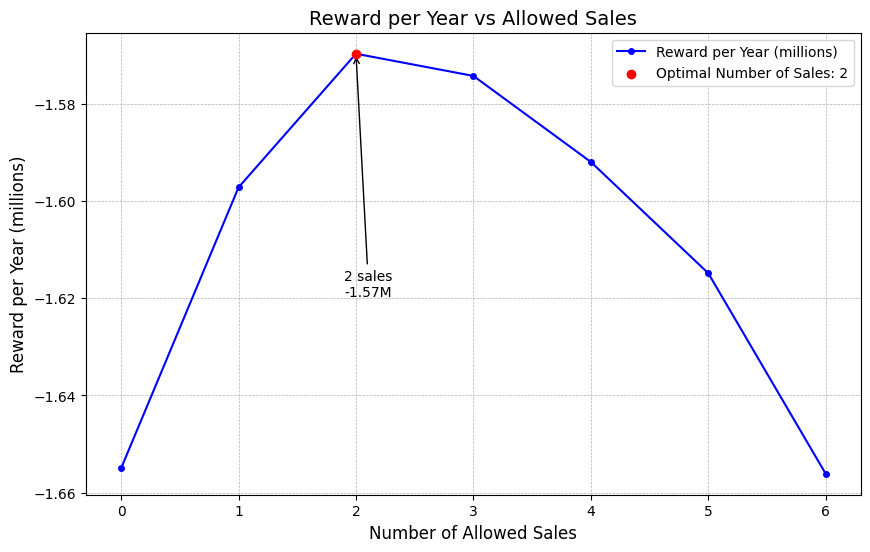

In [305]:
from env import DataCenterEnv
import actor
import importlib
importlib.reload(actor)
import matplotlib.pyplot as plt
import numpy as np
import inflect
o_suffix = inflect.engine()
import matplotlib.ticker as ticker


environment_train = DataCenterEnv('train.xlsx')
environment_test = DataCenterEnv('validate.xlsx')

actor_type = 'EMA'

if actor_type == 'EMA':
    agent = actor.ExponentialMovingAverage(number_of_sales=1)
elif actor_type == 'SMA':
    agent = actor.SimpleMovingAverageActor()


test_range = list(range(7))
reward_per_year = []

for t in test_range:
    if actor_type == 'SMA':
        print(f"\nTesting a time window of {t} hours:")
    elif actor_type == 'EMA':
        print(f"Testing {t} number of purchases allowed:")
    agent = actor.ExponentialMovingAverage(number_of_sales=t)
    aggregate_reward = 0
    terminated = False
    plotting_data = []
    average_filled = 0
    amount_of_days = 0
    state = environment_train.reset()
    while not terminated:
        # agent is your own imported agent class
        action = agent.act(state)
        plotting_data.append(agent.get_plotting_data())
        # next_state is given as: [storage_level, price, hour, day]
        next_state, reward, terminated = environment_train.step(action)
        state = next_state
        aggregate_reward += reward
        storage,price,hour,day_ = state
        if hour == 24:
            average_filled += storage
            amount_of_days += 1
        if day_ >= 7 and False:
            terminated = True
        """print("Action:", action)
        print("Next state:", next_state)
        print("Reward:", reward)"""
    print(f'Total reward for actor {actor_type}: {aggregate_reward}')
    print(f'Reward per year for actor {actor_type}: {aggregate_reward / 3}') # devide by 2 if run on the test set
    print(average_filled/amount_of_days)
    print(len(plotting_data[0]))
    #plot_data_ema(plotting_data[:72])
    #plot_data_ema(plotting_data[-72:])
    reward_per_year.append(aggregate_reward / 3)


if actor_type == "EMA":
    plot_purchse_rewards(test_range, reward_per_year)
